In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('Employee.xlsx')
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [ ]:
df['PaymentTier'] = df['PaymentTier'].astype('category')
df['Education'] = df['Education'].astype('category')
df['City'] = df['City'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['EverBenched'] = df['EverBenched'].astype('category')
df['LeaveOrNot'] = df['LeaveOrNot'].astype('category')

In [ ]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
le = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['Education']= le.fit_transform(df['Education'])
df['City']= le.fit_transform(df['City'])
df['PaymentTier']= le.fit_transform(df['PaymentTier'])
df['Gender']= le.fit_transform(df['Gender'])
df['EverBenched']= le.fit_transform(df['EverBenched'])
df['LeaveOrNot']= le.fit_transform(df['LeaveOrNot'])

In [ ]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,2,34,1,0,0,0
1,0,2013,2,0,28,0,0,3,1
2,0,2014,1,2,38,0,0,2,0
3,1,2016,0,2,27,1,0,5,1
4,1,2017,2,2,24,1,1,2,1


In [ ]:
df.shape

(5000, 9)

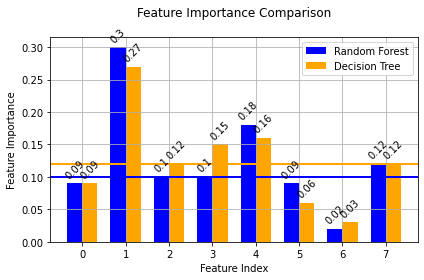

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

X = df.drop(columns = 'LeaveOrNot')
y = df['LeaveOrNot']

# define the model
model_rf = RandomForestClassifier()
model_dt = DecisionTreeClassifier()

# fit the model
model_rf.fit(X, y)
model_dt.fit(X, y)

# get importance
importance_rf = np.round(model_rf.feature_importances_,2)
importance_dt = np.round(model_dt.feature_importances_,2)

# create label for x acis
labels = ['0', '1', '2', '3',
           '4', '5', '6', '7']

# label location
x = np.arange(len(labels))

# set width of bars
width = 0.35 

# create bar plot
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, importance_rf, width, label='Random Forest', color = 'blue')
rects2 = ax.bar(x + width/2, importance_dt, width, label='Decision Tree', color = 'orange')

# add a horizontal line
ax.axhline(np.median(importance_rf), color='blue', linewidth=2)
ax.axhline(np.median(importance_dt), color='orange', linewidth=2)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Feature Index')
ax.set_ylabel('Feature Importance')
ax.set_title('Feature Importance Comparison\n')
ax.legend()

# add a bar label
ax.bar_label(rects1, padding=3, rotation = 45)
ax.bar_label(rects2, padding=3, rotation = 45)

fig.tight_layout()

plt.grid()

plt.show()

In [ ]:
from pycaret.classification import *

df_fix = df[['Education', 'JoiningYear', 'PaymentTier','Age', 'Gender','ExperienceInCurrentDomain','LeaveOrNot']]


exp_set = setup(df_fix, target = 'LeaveOrNot', numeric_features = ['JoiningYear', 'Age', 'ExperienceInCurrentDomain'],
                feature_selection = True, normalize = True, fix_imbalance = True)

,Description,Value
0,session_id,6345
1,Target,LeaveOrNot
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(5000, 7)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
compare_models(include = ['rf', 'dt', 'knn', 'nb', 'lr'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7885,0.8130,0.6532,0.7121,0.6808,0.5232,0.5247,1.215
dt,Decision Tree Classifier,0.7779,0.7669,0.6465,0.6913,0.6677,0.5013,0.5023,0.038
knn,K Neighbors Classifier,0.7548,0.7921,0.6863,0.6352,0.6591,0.4683,0.4697,0.141
nb,Naive Bayes,0.6911,0.7167,0.5530,0.5542,0.5531,0.3172,0.3175,0.031
lr,Logistic Regression,0.6822,0.7108,0.6250,0.5341,0.5758,0.3243,0.3270,0.053


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=6345, verbose=0,
                       warm_start=False)

In [ ]:
model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=6345, verbose=0,
                       warm_start=False)

df_fix = df[['Education', 'JoiningYear', 'PaymentTier','Age', 'Gender','ExperienceInCurrentDomain','LeaveOrNot']]

X = df_fix.drop(columns = 'LeaveOrNot')
y = df_fix['LeaveOrNot']

model.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=6345, verbose=0,
                       warm_start=False)

In [ ]:
# save the model to disk
filename = 'finalized_model.sav'
pkl.dump(model, open(filename, 'wb'))